## Assignment 7.1

REFERRAL CODE: SIRSS2105
<br>**SHUBHAM SALOKHE**

**1. Implement gradient descent (for simple linear regression) from scratch.**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("Salary_Data.csv")
df.head(10)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [3]:
df.shape

(30, 2)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [5]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [6]:
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [7]:
df.columns

Index(['YearsExperience', 'Salary'], dtype='object')

In [8]:
df.nunique()

YearsExperience    28
Salary             30
dtype: int64

In [9]:
X = df.iloc[:, :-1].values #Years of experience 
Y = df.iloc[:,-1].values #Salary

### Implementation of Simple Linear Regression

creating simple linear regression model  

In [10]:
# class function 
class SimpleLinearRegression():
    def __init__(self , learning_rate , iterations):
        self.learning_rate = learning_rate
        self.iterations = iterations
    #function for model training
    def fit(self , X,Y):
        # no_of_training_exaples,no_of_features
        self.m, self.n = X.shape
        #weight initialization
        self.W = np.zeros(self.n)
        self.b = 0
        self.X = X
        self.Y = Y
        #gradient descent learning
        for i in range(self.iterations):
            self.update_weights()
        return self
    #help function to update weights in gradients descent
    def update_weights(self):
        Y_pred = self.predict(self.X)
        #calculating gradients
        dW = -(2*(self.X.T).dot(self.Y - Y_pred)) / self.m
        db = - 2 *np.sum(self.Y - Y_pred) / self.m
        #update weights
        self.W = self.W - self.learning_rate *dW
        self.b = self.b - self.learning_rate *db
        return self
    def predict(self,X):
            return X.dot(self.W) +self.b


## Training the model

**Model predictions with all values (without train-test split)**

In [11]:
mdl = SimpleLinearRegression( iterations = 1000, learning_rate = 0.01)
mdl.fit(X, Y)

In [12]:
result = mdl.predict(X)

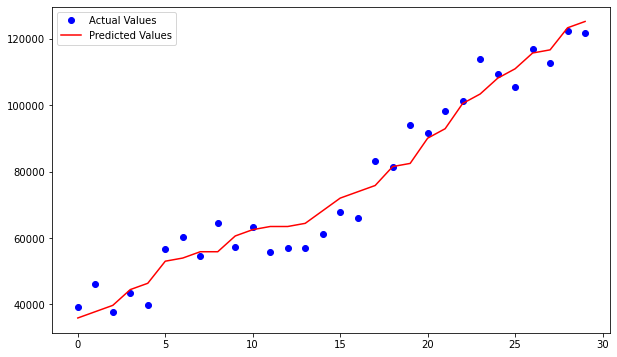

In [13]:
plt.figure(figsize = (10,6))
plt.plot(Y,'o', color = 'blue', label = 'Actual Values')
plt.plot(result,color = 'red',label = "Predicted Values")
plt.legend()

In [14]:
test_df = pd.DataFrame()
test_df['Actual Values'] = Y        #assigning values 
test_df['Predicted_values'] = result  #assigning values 
test_df

,Actual Values,Predicted_values
0,39343.0,35899.296287
1,46205.0,37799.498931
2,37731.0,39699.701575
3,43525.0,44450.208185
4,39891.0,46350.410829
5,56642.0,53001.120083
6,60150.0,53951.221405
7,54445.0,55851.424049
8,64445.0,55851.424049
9,57189.0,60601.930658


## Model predictions with train-test split

In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.3,random_state = 0)

In [16]:
mdl2 = SimpleLinearRegression( iterations = 1000, learning_rate = 0.01)
mdl2.fit(X,Y)

In [17]:
Y_pred = mdl2.predict(x_test)

In [18]:
test2_df = pd.DataFrame()
test2_df['Actual Values'] = y_test
test2_df["Predicted_values"]= Y_pred
test2_df

,Actual Values,Predicted_values
0,37731.0,39699.701575
1,122391.0,123308.617908
2,57081.0,64402.335946
3,63218.0,62502.133302
4,116969.0,115707.807332
5,109431.0,108106.996756
6,112635.0,116657.908654
7,55794.0,63452.234624
8,83088.0,75803.551810


In [19]:
print("Trained weight: ", round(mdl2.W[0], 2))
print("trained bias: ", round(mdl2.b,2))

Trained weight:  9501.01
trained bias:  25448.18


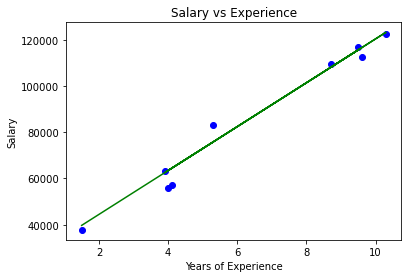

In [20]:
plt.scatter( x_test, y_test, color = 'blue' )
plt.plot( x_test, Y_pred, color = 'green' )
plt.title( 'Salary vs Experience' )
plt.xlabel( 'Years of Experience' )
plt.ylabel( 'Salary' )
plt.show()